In [507]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [508]:
import warnings                            
warnings.filterwarnings(action="ignore")

In [509]:
df = pd.read_csv('DA-AI-ML-interview-assignment-Data.csv', index_col=0)
df

,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,"8,06,229","46,149",30.5k,"100,000 years ago, at least six human species ...",history
1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,"3,67,056","12,879","6,538","""Diamond has written a book of remarkable scop...",history
2,A People's History of the United States,4.07,Howard Zinn,"2,24,620","6,509","2,354","In the book, Zinn presented a different side o...",history
3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,"6,13,157","36,644",64.2k,Author Erik Larson imbues the incredible event...,history
4,The Diary of a Young Girl,4.18,Anne Frank,"33,13,033","35,591","4,621",Discovered in the attic in which she spent the...,history
...,...,...,...,...,...,...,...,...
1534,Hounded,4.09,Kevin Hearne,"83,827","7,203","11,905","Atticus O’Sullivan, last of the Druids, lives ...",fantasy
1535,Charlie and the Chocolate Factory,4.15,Roald Dahl,"7,75,001","14,252","22,897",Charlie Bucket's wonderful adventure begins wh...,fantasy
1536,Red Rising,4.25,Pierce Brown,"3,10,138","30,388","30,510","""I live for the dream that my children will be...",fantasy
1537,Frostbite,4.26,Richelle Mead,"3,37,538","12,435","66,448","Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy


# Data Analysis

In [510]:
df.isna().sum()

title            0
rating           0
name             0
num_ratings      0
num_reviews      0
num_followers    0
synopsis         0
genre            0
dtype: int64

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1538
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1539 non-null   object 
 1   rating         1539 non-null   float64
 2   name           1539 non-null   object 
 3   num_ratings    1539 non-null   object 
 4   num_reviews    1539 non-null   object 
 5   num_followers  1539 non-null   object 
 6   synopsis       1539 non-null   object 
 7   genre          1539 non-null   object 
dtypes: float64(1), object(7)
memory usage: 108.2+ KB


In [512]:
df.describe()

,rating
count,1539.000000
mean,4.037518
std,0.225939
min,2.780000
25%,3.905000
50%,4.050000
75%,4.180000
max,4.750000


#### Count unique number of titles

In [513]:
df['title'].nunique()

1539

#### Converting num_rating, num_reviews, num_followers into exact integers.

In [514]:
df['num_ratings'] = df['num_ratings'].str.replace(',','')
df['num_reviews'] = df['num_reviews'].str.replace(',','')
df['num_followers'] = df['num_followers'].str.replace(',','')

#### Removing k from num_followers

In [515]:
def extract_int(s):
    return "".join(x for x in str(s) if x.isdigit())

df['num_followers'] = df['num_followers'].map(extract_int)

In [516]:
df.head()

,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,806229,46149,305,"100,000 years ago, at least six human species ...",history
1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,367056,12879,6538,"""Diamond has written a book of remarkable scop...",history
2,A People's History of the United States,4.07,Howard Zinn,224620,6509,2354,"In the book, Zinn presented a different side o...",history
3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,613157,36644,642,Author Erik Larson imbues the incredible event...,history
4,The Diary of a Young Girl,4.18,Anne Frank,3313033,35591,4621,Discovered in the attic in which she spent the...,history


In [517]:
df['num_ratings'] = pd.to_numeric(df['num_ratings'])
df['num_reviews'] = pd.to_numeric(df['num_reviews'])
df['num_followers'] = pd.to_numeric(df['num_followers'])

In [518]:
df2 = df.copy() # make a copy so that we can do data preprocessing for 2nd part. prediction of rating

In [519]:
df.dtypes

title             object
rating           float64
name              object
num_ratings        int64
num_reviews        int64
num_followers      int64
synopsis          object
genre             object
dtype: object

#### Count unique Genre

In [520]:
df['genre'].nunique()

10

#### Count books in each genre

In [521]:
df.groupby('genre')['genre'].count().sort_values(ascending=False)

genre
thriller           481
fantasy            348
romance            111
horror             100
history             99
psychology          99
travel              98
science             79
sports              79
science_fiction     45
Name: genre, dtype: int64

# Data Visualization

In [522]:
df['rating'].value_counts()

4.05    39
4.09    37
4.11    36
4.03    36
4.06    34
        ..
3.45     1
3.32     1
3.48     1
3.42     1
4.67     1
Name: rating, Length: 130, dtype: int64

Text(0, 0.5, 'Frequency')

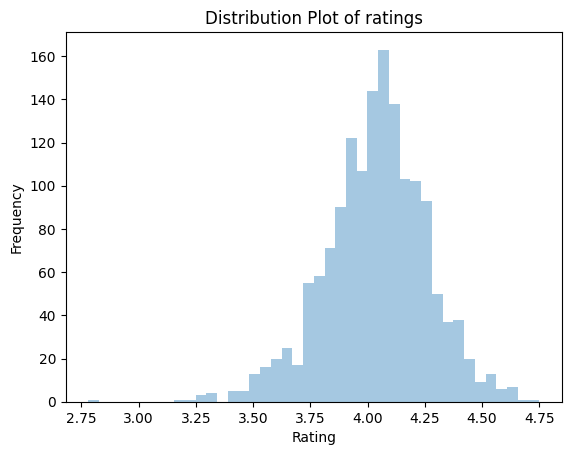

In [523]:
sns.distplot(x=df['rating'], kde=False)
plt.title('Distribution Plot of ratings')         
plt.xlabel('Rating')
plt.ylabel('Frequency')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'history'),
  Text(1, 0, 'horror'),
  Text(2, 0, 'psychology'),
  Text(3, 0, 'romance'),
  Text(4, 0, 'science'),
  Text(5, 0, 'science_fiction'),
  Text(6, 0, 'sports'),
  Text(7, 0, 'thriller'),
  Text(8, 0, 'travel'),
  Text(9, 0, 'fantasy')])

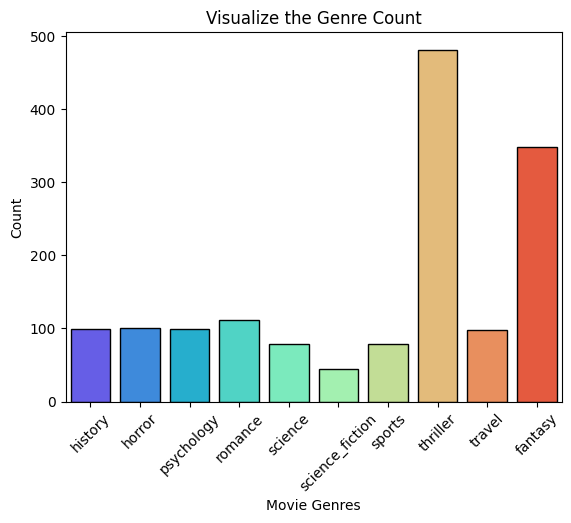

In [524]:
sns.countplot(x='genre', data=df,palette='rainbow',edgecolor=(0,0,0))
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Visualize the Genre Count')
plt.xticks(rotation=45)

In [525]:
df[['title','num_ratings']].sort_values(by='num_ratings', ascending=False, ignore_index=True)

,title,num_ratings
0,Harry Potter and the Sorcerer's Stone,8739776
1,The Hunger Games,7543770
2,Twilight,5864394
3,The Fault in Our Stars,4462969
4,1984,3928270
...,...,...
1534,The Good Girl's Guide to Getting Lost: A Memoi...,3759
1535,Travel as a Political Act,3173
1536,Between the Woods and the Water,3121
1537,The Road to Oxiana,3017


#### Top 10 Titles by number of ratings

In [526]:
df10 = df[['title','num_ratings']].sort_values(by='num_ratings', ascending=False, ignore_index=True).iloc[:11,:]
df10

,title,num_ratings
0,Harry Potter and the Sorcerer's Stone,8739776
1,The Hunger Games,7543770
2,Twilight,5864394
3,The Fault in Our Stars,4462969
4,1984,3928270
5,Pride and Prejudice,3702809
6,Harry Potter and the Prisoner of Azkaban,3554132
7,Divergent,3518696
8,The Hobbit,3449648
9,Harry Potter and the Chamber of Secrets,3374768


<AxesSubplot: xlabel='num_ratings', ylabel='title'>

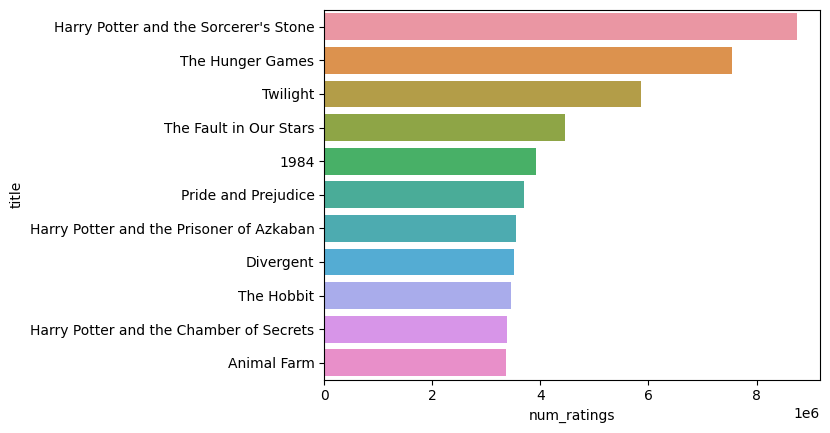

In [527]:
sns.barplot(y='title',x='num_ratings',data=df10)

#### Top 10 Titles by number of reviews

In [528]:
df10 = df[['title','num_reviews']].sort_values(by='num_reviews', ascending=False, ignore_index=True).iloc[:11,:]
df10

,title,num_reviews
0,The Hunger Games,186913
1,The Fault in Our Stars,168215
2,It Ends with Us,147653
3,Gone Girl,142406
4,Harry Potter and the Sorcerer's Stone,137696
5,The Book Thief,129623
6,Verity,121802
7,The Girl on the Train,118600
8,Twilight,116972
9,Divergent,114503


(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000.]),
 [Text(0.0, 0, '0'),
  Text(25000.0, 0, '25000'),
  Text(50000.0, 0, '50000'),
  Text(75000.0, 0, '75000'),
  Text(100000.0, 0, '100000'),
  Text(125000.0, 0, '125000'),
  Text(150000.0, 0, '150000'),
  Text(175000.0, 0, '175000'),
  Text(200000.0, 0, '200000')])

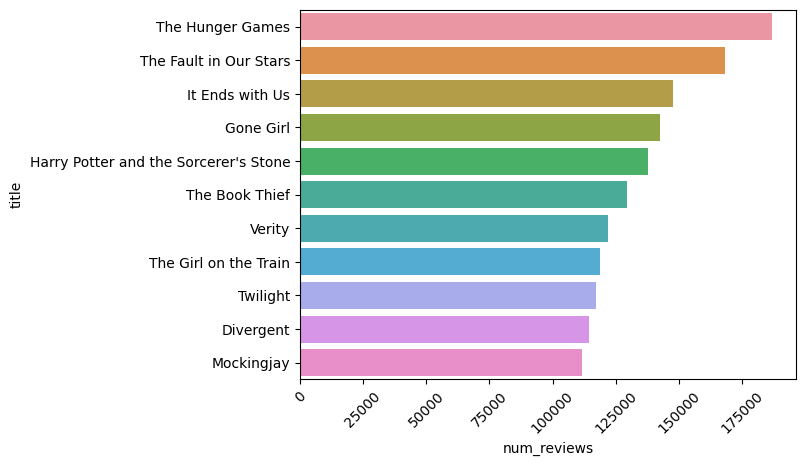

In [529]:
sns.barplot(y='title',x='num_reviews',data=df10)
plt.xticks(rotation=45)

# Genre Prediction
We will use Synopsis to predict the Genre using NLP Text Processing using NLTK

In [530]:
import string
import random
import nltk
import re
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [537]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [540]:
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['synopsis'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [541]:
len(corpus)

1539

#### mapping Genre to values

In [542]:
df['genre'].unique()

array(['history', 'horror', 'psychology', 'romance', 'science',
       'science_fiction', 'sports', 'thriller', 'travel', 'fantasy'],
      dtype=object)

In [543]:
genre_mapper = {'history': 0, 'horror': 1, 'psychology': 2, 'romance':3, 'science':4, 'science_fiction':5, 'sports':6, 
                'travel':7, 'thriller': 8, 'fantasy': 9}
df['genre'] = df['genre'].map(genre_mapper)
df

,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,806229,46149,305,"100,000 years ago, at least six human species ...",0
1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,367056,12879,6538,"""Diamond has written a book of remarkable scop...",0
2,A People's History of the United States,4.07,Howard Zinn,224620,6509,2354,"In the book, Zinn presented a different side o...",0
3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,613157,36644,642,Author Erik Larson imbues the incredible event...,0
4,The Diary of a Young Girl,4.18,Anne Frank,3313033,35591,4621,Discovered in the attic in which she spent the...,0
...,...,...,...,...,...,...,...,...
1534,Hounded,4.09,Kevin Hearne,83827,7203,11905,"Atticus O’Sullivan, last of the Druids, lives ...",9
1535,Charlie and the Chocolate Factory,4.15,Roald Dahl,775001,14252,22897,Charlie Bucket's wonderful adventure begins wh...,9
1536,Red Rising,4.25,Pierce Brown,310138,30388,30510,"""I live for the dream that my children will be...",9
1537,Frostbite,4.26,Richelle Mead,337538,12435,66448,"Rose loves Dimitri, Dimitri might love Tasha, ...",9


In [544]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [545]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

X = tfidf_vectorizer.fit_transform(corpus).toarray()

In [599]:
X.shape

(1539, 10000)

In [547]:
y = df['genre'].values
y.shape

(1539,)

In [548]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1231, 10000), X_test size: (308, 10000)


In [549]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [550]:
# Predicting the Test set results
y_pred = nb_classifier.predict(X_test)

In [551]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score1 = accuracy_score(y_test, y_pred)
print("Accuracy : {}%".format(round(score1*100,2)))

Accuracy : 44.81%


In [552]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.01,0.1,0.01):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,2), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,2)))

Accuracy score for alpha=0.01 is: 75.65%
Accuracy score for alpha=0.02 is: 75.97%
Accuracy score for alpha=0.03 is: 76.62%
Accuracy score for alpha=0.04 is: 75.97%
Accuracy score for alpha=0.05 is: 76.95%
Accuracy score for alpha=0.06 is: 74.35%
Accuracy score for alpha=0.07 is: 74.03%
Accuracy score for alpha=0.08 is: 73.7%
Accuracy score for alpha=0.09 is: 73.38%
The best accuracy is 76.95% with alpha value as 0.05


#### Best Accuracy is with hyperparameter 0.05

In [553]:
nb_classifier = MultinomialNB(alpha=0.05)
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

In [554]:
y_pred = nb_classifier.predict(X_test)

In [555]:
score1 = accuracy_score(y_test, y_pred)
print("Accuracy : {}%".format(round(score1*100,2)))

Accuracy : 76.95%


In [556]:
print ('Report : ')                            # classification report.
print(classification_report(y_test,y_pred))

Report : 
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        15
           1       0.67      0.17      0.28        23
           2       0.79      0.75      0.77        20
           3       0.70      0.30      0.42        23
           4       0.91      0.77      0.83        13
           5       0.50      0.17      0.25         6
           6       0.94      0.80      0.86        20
           7       0.82      0.64      0.72        22
           8       0.70      0.98      0.82        90
           9       0.84      0.92      0.88        76

    accuracy                           0.77       308
   macro avg       0.75      0.63      0.66       308
weighted avg       0.77      0.77      0.74       308



#### Using Support Vector Classification

In [557]:
from sklearn import svm
svc = svm.SVC(kernel='linear').fit(X_train,y_train)
svpred=svc.predict(X_test)

In [558]:
score1 = accuracy_score(y_test, svpred)
print("Accuracy : {}%".format(round(score1*100,2)))

Accuracy : 74.35%


In [559]:
print ('Report : ')                            # classification report.
print(classification_report(y_test,svpred))

Report : 
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       1.00      0.22      0.36        23
           2       0.93      0.65      0.76        20
           3       0.57      0.17      0.27        23
           4       0.92      0.85      0.88        13
           5       1.00      0.17      0.29         6
           6       1.00      0.70      0.82        20
           7       0.94      0.68      0.79        22
           8       0.63      0.99      0.77        90
           9       0.76      0.88      0.82        76

    accuracy                           0.74       308
   macro avg       0.87      0.60      0.66       308
weighted avg       0.79      0.74      0.71       308



#### We will use MultinominalNB model to predict the genre

In [560]:
def genre_prediction(sample_script):
    return nb_classifier.predict(sample_script)

for i in range(20): 
    rn = random.randint(0,307)
    ans = genre_prediction(X_test[rn].reshape(1, -1))
    
    # Genrating the genre name from genre_mapper dictionary that we build above
    print("Original -", list(genre_mapper.keys())[list(genre_mapper.values()).index(int(y_train[rn]))])
    print("Predicted -", list(genre_mapper.keys())[list(genre_mapper.values()).index(int(ans))])   
    print("\n")



Original - thriller
Predicted - thriller


Original - thriller
Predicted - thriller


Original - science
Predicted - history


Original - fantasy
Predicted - romance


Original - fantasy
Predicted - psychology


Original - horror
Predicted - thriller


Original - science
Predicted - thriller


Original - psychology
Predicted - thriller


Original - science
Predicted - thriller


Original - science
Predicted - thriller


Original - thriller
Predicted - thriller


Original - thriller
Predicted - thriller


Original - thriller
Predicted - fantasy


Original - romance
Predicted - thriller


Original - history
Predicted - fantasy


Original - thriller
Predicted - horror


Original - travel
Predicted - fantasy


Original - thriller
Predicted - fantasy


Original - thriller
Predicted - thriller


Original - fantasy
Predicted - thriller




# Predict the Rating

In [582]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [561]:
df2.columns

Index(['title', 'rating', 'name', 'num_ratings', 'num_reviews',
       'num_followers', 'synopsis', 'genre'],
      dtype='object')

#### Data Preprocesssing
Anomaly Detection

In [562]:
df2['name'].nunique()

842

<AxesSubplot: xlabel='num_ratings'>

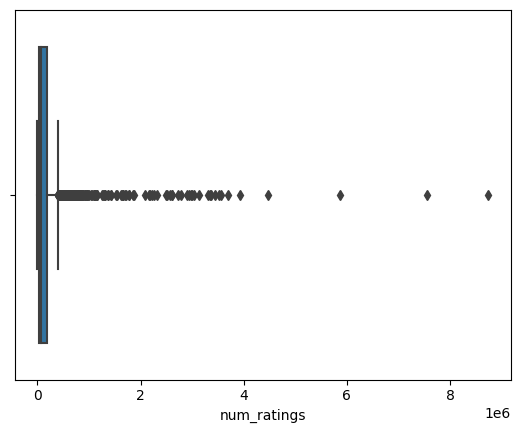

In [563]:
sns.boxplot(x=df2['num_ratings'])

In [564]:
df2 = df2.drop(df2.index[df2['num_ratings'] >= 1000000])

<AxesSubplot: xlabel='num_reviews'>

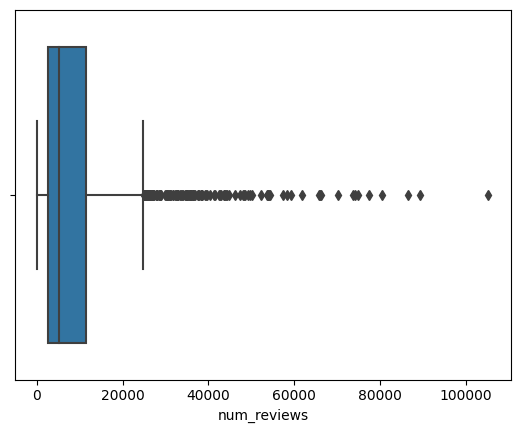

In [565]:
sns.boxplot(x=df2['num_reviews'])

In [566]:
df2 = df2.drop(df2.index[df2['num_reviews'] >= 40000])

<AxesSubplot: xlabel='num_followers'>

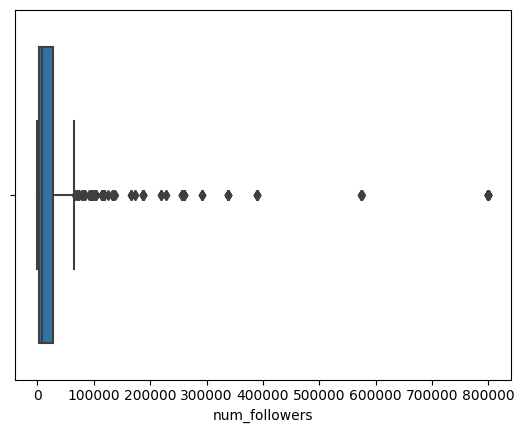

In [567]:
sns.boxplot(x=df2['num_followers'])

In [568]:
df2 = df2.drop(df2.index[df2['num_followers'] >= 100000])

In [569]:
cols = pd.get_dummies(df2['genre'])

In [570]:
cols

,fantasy,history,horror,psychology,romance,science,science_fiction,sports,thriller,travel
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1534,1,0,0,0,0,0,0,0,0,0
1535,1,0,0,0,0,0,0,0,0,0
1536,1,0,0,0,0,0,0,0,0,0
1537,1,0,0,0,0,0,0,0,0,0


In [571]:
df2 = pd.concat([df2, cols] ,axis=1)
df2

,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre,fantasy,history,horror,psychology,romance,science,science_fiction,sports,thriller,travel
1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,367056,12879,6538,"""Diamond has written a book of remarkable scop...",history,0,1,0,0,0,0,0,0,0,0
2,A People's History of the United States,4.07,Howard Zinn,224620,6509,2354,"In the book, Zinn presented a different side o...",history,0,1,0,0,0,0,0,0,0,0
3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,613157,36644,642,Author Erik Larson imbues the incredible event...,history,0,1,0,0,0,0,0,0,0,0
5,1776,4.08,David McCullough,214796,7910,9137,"In this masterful book, David McCullough tells...",history,0,1,0,0,0,0,0,0,0,0
6,A Short History of Nearly Everything,4.20,Bill Bryson,352894,14428,183,Bill Bryson describes himself as a reluctant t...,history,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,Hounded,4.09,Kevin Hearne,83827,7203,11905,"Atticus O’Sullivan, last of the Druids, lives ...",fantasy,1,0,0,0,0,0,0,0,0,0
1535,Charlie and the Chocolate Factory,4.15,Roald Dahl,775001,14252,22897,Charlie Bucket's wonderful adventure begins wh...,fantasy,1,0,0,0,0,0,0,0,0,0
1536,Red Rising,4.25,Pierce Brown,310138,30388,30510,"""I live for the dream that my children will be...",fantasy,1,0,0,0,0,0,0,0,0,0
1537,Frostbite,4.26,Richelle Mead,337538,12435,66448,"Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy,1,0,0,0,0,0,0,0,0,0


In [572]:
y = df2['rating']
df2.drop(['title','rating','name','synopsis','genre'], axis=1, inplace=True)

,num_ratings,num_reviews,num_followers,fantasy,history,horror,psychology,romance,science,science_fiction,sports,thriller,travel
1,367056,12879,6538,0,1,0,0,0,0,0,0,0,0
2,224620,6509,2354,0,1,0,0,0,0,0,0,0,0
3,613157,36644,642,0,1,0,0,0,0,0,0,0,0
5,214796,7910,9137,0,1,0,0,0,0,0,0,0,0
6,352894,14428,183,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,83827,7203,11905,1,0,0,0,0,0,0,0,0,0
1535,775001,14252,22897,1,0,0,0,0,0,0,0,0,0
1536,310138,30388,30510,1,0,0,0,0,0,0,0,0,0
1537,337538,12435,66448,1,0,0,0,0,0,0,0,0,0


In [573]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size = 0.25, random_state = 44)

In [575]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [576]:
predictions = lr.predict(X_test)

In [577]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,4.17,4.249017
1,4.04,3.952359
2,4.00,4.151173
3,4.04,4.151320
4,3.84,4.001729
5,3.95,4.114061
6,3.88,4.123709
7,2.78,3.892245
8,4.15,3.920391
9,4.26,3.918914


<AxesSubplot: >

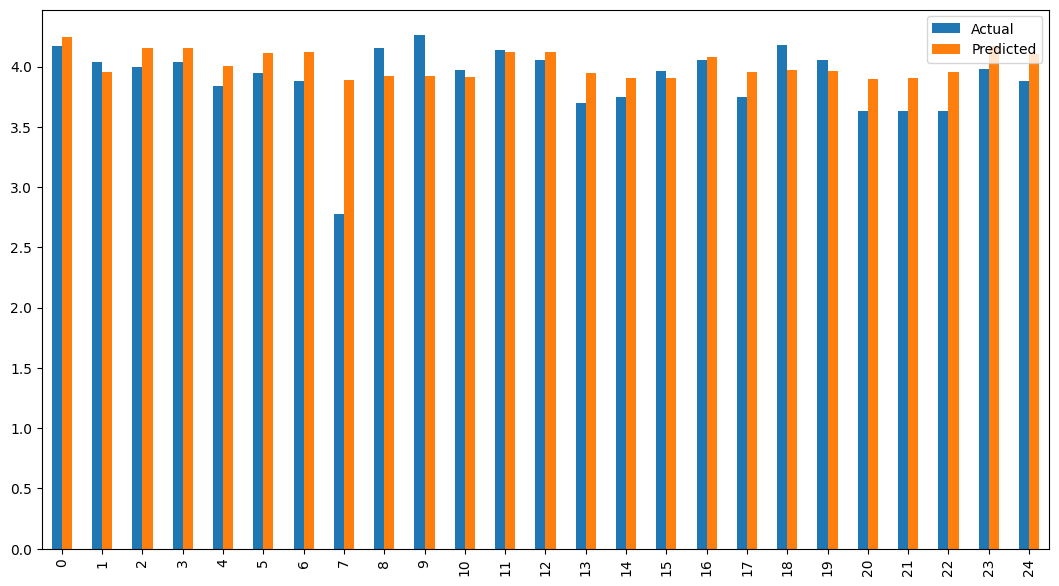

In [578]:
pred.plot(kind='bar', figsize=(13, 7))

In [597]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2_value:',metrics.r2_score(y_test, predictions))

MAE: 0.1529693779157134
MSE: 0.04085601719829251
RMSE: 0.2021287144328893
R2_value: 0.17542059178705938


#### Using Random Forest

In [585]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [586]:
predictions_rf = model.predict(X_test)

In [596]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_rf))
print('MSE:', metrics.mean_squared_error(y_test, predictions_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rf)))
print('R2_value:',metrics.r2_score(y_test, predictions_rf))

MAE: 0.14517398119122257
MSE: 0.03668871332288401
RMSE: 0.19154298035397696
R2_value: 0.2595274920448615


In [588]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions_rf.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,4.17,4.1120
1,4.04,3.8358
2,4.00,4.1811
3,4.04,4.1901
4,3.84,3.8899
5,3.95,4.0421
6,3.88,4.1674
7,2.78,3.7635
8,4.15,4.1277
9,4.26,4.1906


<AxesSubplot: >

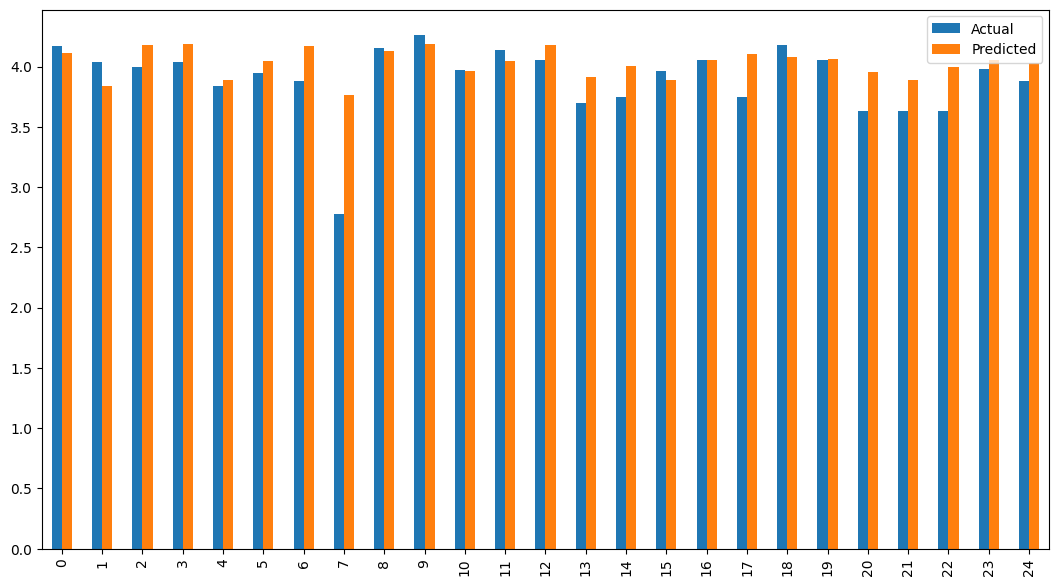

In [589]:
pred.plot(kind='bar', figsize=(13, 7))

#### Random forest worked little bit better than linear regression